In [46]:
# Packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [47]:
# Data

df = pd.read_csv(r'C:\Users\Kevin\Downloads\Work\Python Correlation Project\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [48]:
# Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
          
df.isnull().sum()

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [49]:
# Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [50]:
# Check if 'budget' Data End in .0

import re

# Sets NaN values to 0.0

for i in range(len(df['budget'])):
    if np.isnan(df['budget'][i]):
        df['budget'][i] = 0.0
        
# RegEx to check if numbers end in .0
        
count = 0
for i in range(len(df['budget'])):
    if re.search('\\.0$',str(df['budget'][i])):
        count += 1

# Count == Length, thus all values end in .0

count == len(df['budget'])

True

In [51]:
# Check'gross' 

for i in range(len(df['gross'])):
    if np.isnan(df['gross'][i]):
        df['gross'][i] = 0.0
        
# RegEx to check if numbers end in .0
        
count1 = 0
for i in range(len(df['gross'])):
    if re.search('\\.0$',str(df['gross'][i])):
        count1 += 1

# Count == Length, thus all values end in .0

count1 == len(df['gross'])

True

In [52]:
# Change Data Type
        
df['budget'].isnull().sum()
    
df['budget'] = df['budget'].astype('int64')

# -----     

df['gross'].isnull().sum()

df['gross'] = df['gross'].astype('int64')

In [107]:
# Changing 'Year' to 'Released' Year

# Indexing 'Nan' Values

nan = []
for i in range(len(df['released'])):
    if df['released'].isnull()[i]:
        nan.append(i)

# Getting Index for the year in 'Released' Except for 'Nan'       
        
years = []
for i in range(len(df['released'])):
    if i not in nan:
        years.append(re.search('[0-9]{4}',df['released'][i]).span()[0])
    else:
        years.append('Skip')

# Making New Column with Updated Years

df['yearcorrect'] = df['year']

for i in range(len(df['released'])):
    if i not in nan:
        df['yearcorrect'][i] = df['released'][i][years[i]:years[i]+4]
    else:
        df['yearcorrect'][i] = df['year'][i]
        
# Check Which Rows Have Different 'Year' and 'Yearcorrect'

diff = []
for i in range(len(df['year'])):
    if df['year'][i].astype(str) == df['yearcorrect'][i]:
        continue
    else:
        diff.append(i)
        
df.iloc[diff].head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0,1981
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,0,5000000,Walt Disney Productions,84.0,1981


In [108]:
# Sort Dataframe

pd.set_option('display.max_rows', None)

df.sort_values(by = ['gross'], inplace = False, ascending = False).head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [109]:
# Drop Duplicates

df.drop_duplicates()

df['company'].drop_duplicates().sort_values(ascending = False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

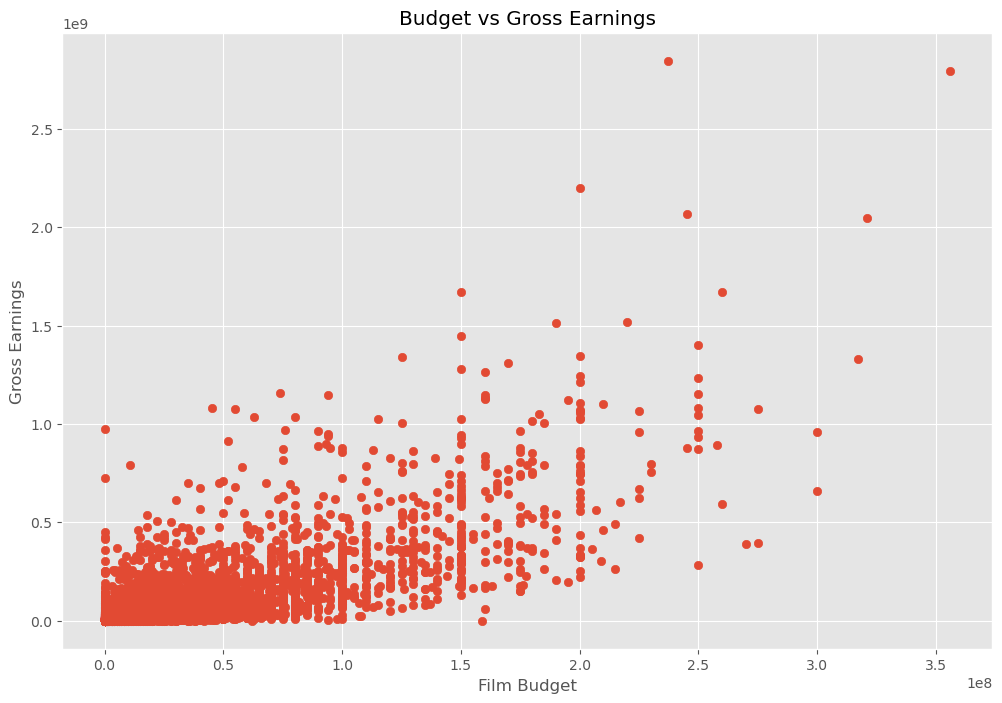

In [56]:
# Scatter Plot: Budget vs Gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

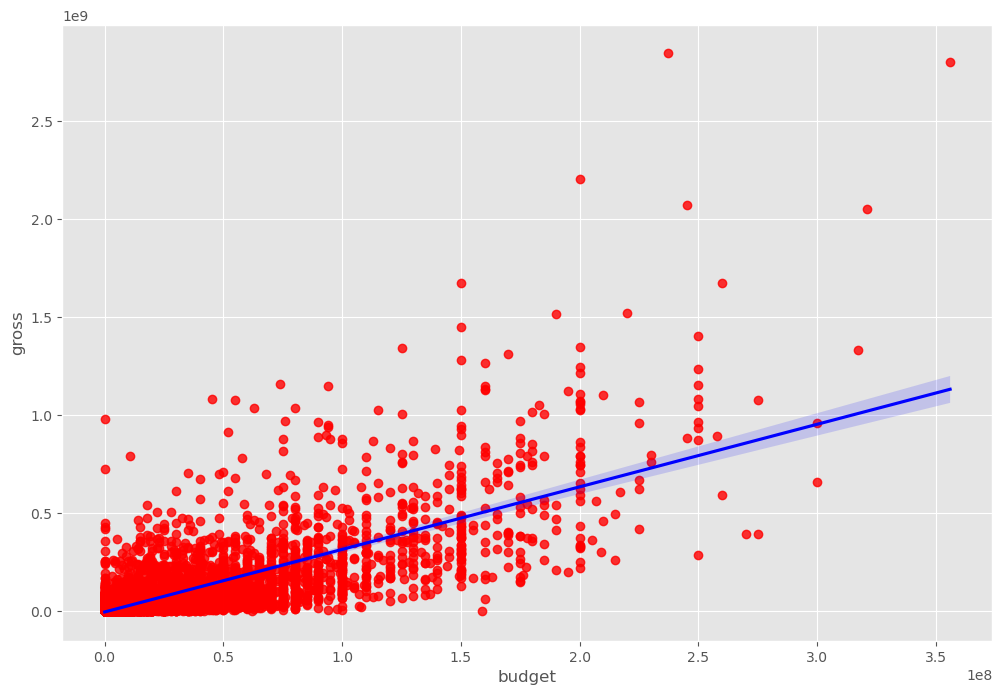

In [12]:
# Seaborn: Budget vs Gross

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

In [13]:
# Correlation

# Pearson: Linear / Normal
df.corr(method = 'pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [34]:
# Correlation

df.corr(method = 'pearson', numeric_only = True).unstack().sort_values(ascending = False)

year     year       1.000000
score    score      1.000000
gross    gross      1.000000
budget   budget     1.000000
votes    votes      1.000000
runtime  runtime    1.000000
gross    budget     0.750157
budget   gross      0.750157
gross    votes      0.632834
votes    gross      0.632834
budget   votes      0.486862
votes    budget     0.486862
score    votes      0.409182
votes    score      0.409182
runtime  score      0.399451
score    runtime    0.399451
runtime  votes      0.309212
votes    runtime    0.309212
year     budget     0.309212
budget   year       0.309212
         runtime    0.269510
runtime  budget     0.269510
gross    year       0.261900
year     gross      0.261900
gross    runtime    0.245235
runtime  gross      0.245235
votes    year       0.222945
year     votes      0.222945
gross    score      0.186392
score    gross      0.186392
year     runtime    0.120811
runtime  year       0.120811
year     score      0.097995
score    year       0.097995
budget   score

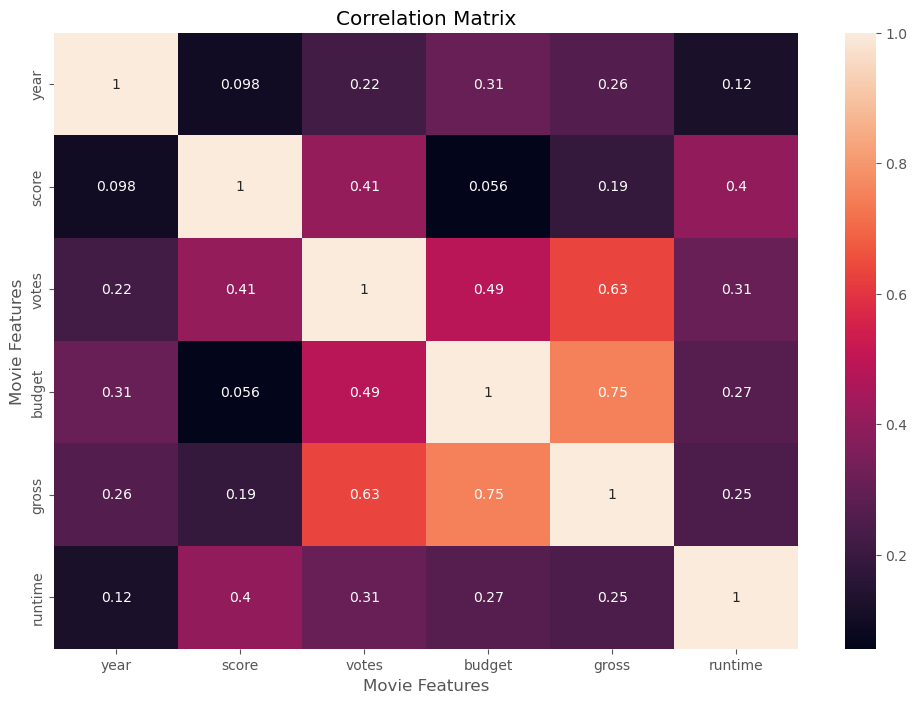

In [14]:
# Correlation Matrix

corr_matrix = df.corr(method = 'pearson', numeric_only = True)
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
# Distinct Companies

company = []

for i in range(len(df['company'])):
    if df['company'][i] not in company:
        company.append(df['company'][i])

len(company)

2386

Text(0.5, 1.0, 'Company vs Gross Earnings')

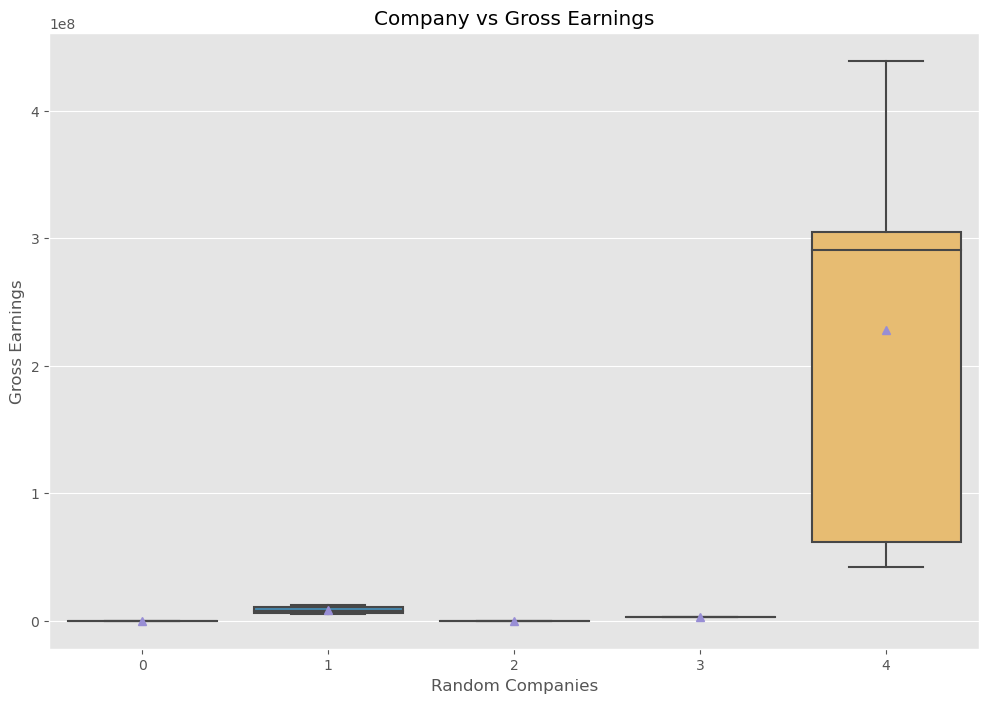

In [106]:
# Attempting to Show Correlation Between Company and Gross

import random

random_comp = random.sample(range(len(company)),5)

comp_gross = []

for i in random_comp:
    comp_gross.append(list(df[df['company'] == company[i]]['gross']))
    
box = sns.boxplot(data = comp_gross, showmeans = True)
box.set_xlabel('Random Companies')
box.set_ylabel('Gross Earnings')
box.set_title('Company vs Gross Earnings')

In [ ]:
# REFERENCES:

# Followed this video tutorial: https://www.youtube.com/watch?v=iPYVYBtUTyE&list=PLUaB-1hjhk8H48Pj32z4GZgGWyylqv85f&index=4